## Genearate dataset having 2 features and 2 classes for classification

In [1]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=100, 
                          n_features=2,
                          n_classes= 2, n_clusters_per_class=1,
                          n_informative=1, n_redundant=0
)

In [2]:
x,y

(array([[-0.87251332,  1.39381804],
        [-1.29995526,  0.39796031],
        [ 0.59309189, -0.181955  ],
        [ 0.53181832,  1.00217968],
        [-1.5185957 ,  0.55580035],
        [ 0.53862494,  1.44594291],
        [-1.09708577,  1.57049037],
        [ 2.70291919,  0.81595847],
        [-0.14165078, -1.60861764],
        [-0.47904977,  0.88301556],
        [ 1.01190263, -1.67800835],
        [-0.69420123,  1.46823349],
        [ 0.63736521,  0.31599935],
        [ 0.06915171, -1.0654975 ],
        [-0.8889196 , -0.89081787],
        [-1.09937245, -1.12418663],
        [ 0.87038109,  0.54012434],
        [-1.20571136, -1.09503316],
        [ 1.18907969,  1.37625677],
        [-0.10836369, -0.85960738],
        [ 0.63997892,  0.28433793],
        [-0.25567527, -1.46054358],
        [ 0.30028616, -0.88759183],
        [ 0.60111709,  1.09466846],
        [-0.33899589, -1.52693916],
        [ 2.03787941,  0.76970829],
        [ 0.50043714,  0.51231968],
        [-1.00141787, -1.800

In [3]:
x.shape

(100, 2)

## plotting the dataset

In [4]:
import matplotlib.pyplot as plt

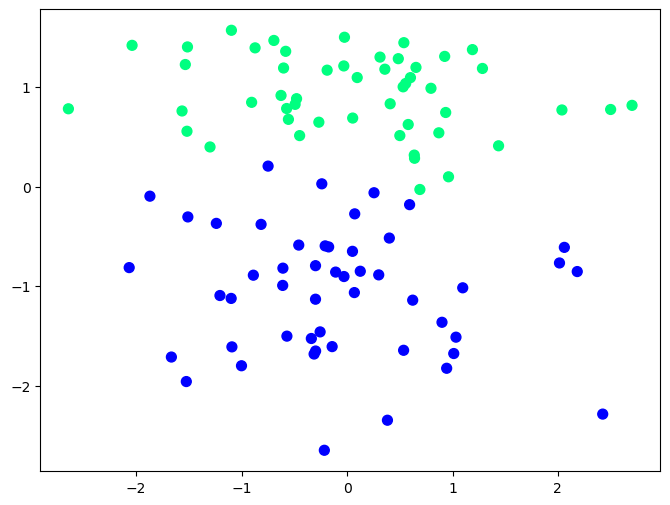

In [5]:
plt.figure(figsize=(8,6))
# feature 1 = x[0] and feature 2 = x[1], classes = 2, 
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)


## Create a perceptron

![perceptron](perceptron.png)


In [6]:
import numpy as np

x = np.insert(x,0,1,axis=1)
x

weights = np.ones(x.shape[1]) # as we need only 1 weight for every input neuron in x
weights

In [7]:
def step(n):
    return 1 if n>0 else 0

In [8]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis=1) # insert 1 as bias term at index 0 of x ex. [ 1.        ,  0.34787011, -0.23084105]
    weights = np.ones(x.shape[1]) # as we need only 1 weight for every input neuron in x
    lr = 0.1
    epochs = 200
    
    #training
    for i in range(epochs):
        j = np.random.randint(0,100) # as we have only 100 samples, we select a random sample from them
        y_hat = step( np.dot( x[j], weights ))
        #update weights 
        weights = weights + lr*( y[j]-y_hat )*x[j]
    
    return weights[0],weights[1:]


## Training the perceptron and getting the weights

#### weights = [ bias coeff_A coeff_B] as our equation is Ax1+ Bx2 + bias = 0

In [9]:
bias, coef = perceptron(x,y)

In [10]:
print("bias term : ",bias)
print("coefficients : ",coef)

bias term :  -0.09999999999999987
coefficients :  [0.33360667 1.45753473]


## Plot the line given by weights after training

equation of line is Ax+By+C = 0
thus in form y = mx + c , m = -A/B and c = -C/B

In [11]:
m = - coef[0]/coef[1]
c = - bias/coef[1]

In [12]:
m , c

(-0.22888419995703793, 0.06860899978057579)

In [13]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

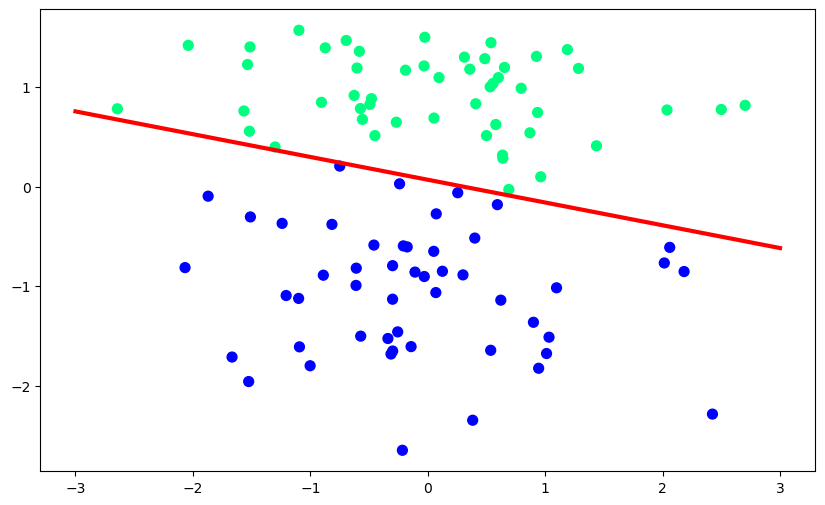

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)